In [1]:
import pandas as pd
df = pd.read_csv('smoking.csv')
df = df[:10000]

In [2]:
df = df.drop(['ID','height(cm)','oral'], axis=1)
df['tartar'] = df['tartar'].apply(lambda x: 1 if x == 'Y' else 0)
df['gender'] = df['gender'].apply(lambda x: 1 if x == 'M' else 0)

In [3]:
df.dtypes

gender                   int64
age                      int64
weight(kg)               int64
waist(cm)              float64
eyesight(left)         float64
eyesight(right)        float64
hearing(left)          float64
hearing(right)         float64
systolic               float64
relaxation             float64
fasting blood sugar    float64
Cholesterol            float64
triglyceride           float64
HDL                    float64
LDL                    float64
hemoglobin             float64
Urine protein          float64
serum creatinine       float64
AST                    float64
ALT                    float64
Gtp                    float64
dental caries            int64
tartar                   int64
smoking                  int64
dtype: object

In [4]:
variabili_pca = list(df.columns[:-1])
print(variabili_pca)

['gender', 'age', 'weight(kg)', 'waist(cm)', 'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST', 'ALT', 'Gtp', 'dental caries', 'tartar']


In [5]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[variabili_pca])
scaled_data # nuovo dataset con standardizzate le colonne

array([[-1.30824185, -0.3498111 , -0.4533991 , ..., -0.25219847,
        -0.5252006 ,  0.89833802],
       [-1.30824185, -0.3498111 , -0.4533991 , ..., -0.42709473,
        -0.5252006 ,  0.89833802],
       [ 0.76438466,  0.89300428, -0.4533991 , ..., -0.34936306,
        -0.5252006 , -1.11316673],
       ...,
       [ 0.76438466,  1.30727608, -0.06260518, ..., -0.21333263,
        -0.5252006 ,  0.89833802],
       [ 0.76438466, -0.7640829 , -0.4533991 , ..., -0.40766182,
        -0.5252006 ,  0.89833802],
       [ 0.76438466, -0.7640829 ,  1.89136437, ..., -0.23276555,
        -0.5252006 ,  0.89833802]])

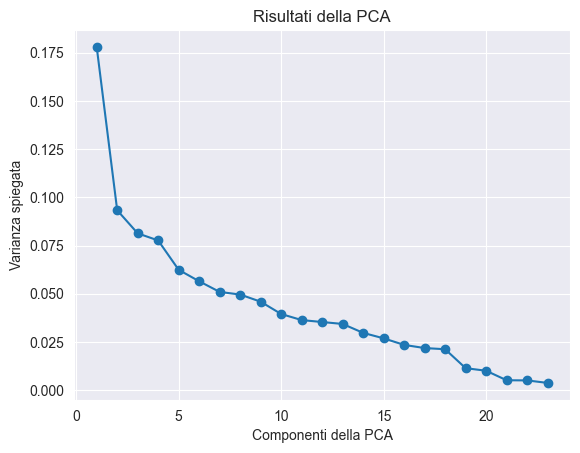

In [6]:
import matplotlib.pyplot as plt

pca = PCA().fit(scaled_data)

# Crea un grafico della varianza spiegata per ogni componente
plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Componenti della PCA')
plt.ylabel('Varianza spiegata')
plt.title("Risultati della PCA")
plt.show()

In [7]:
# Applica la PCA per ridurre la dimensionalità dei dati
pca = PCA(n_components=12).fit(scaled_data)
pca_data = pca.transform(scaled_data)
# Quantifichiamo la percentuale di varianza spiegata da ciascuno delle componenti.
print(pca.explained_variance_ratio_)

[0.1779699  0.09329927 0.08133556 0.07763173 0.06241215 0.05647984
 0.05095945 0.04959773 0.04589814 0.03951102 0.03636944 0.03535539]


In [8]:
sum = 0
for data in pca.explained_variance_ratio_:
    sum += data
print(sum)

0.8068196033912945


In [9]:
pca_df = pd.DataFrame(abs(pca.components_[:12]), columns=df.columns[:-1],
                     index=['PC1','PC2','PC3','PC4','PC5',
                            'PC6','PC7','PC8','PC9','PC10','PC11','PC12'])
pca_df

,gender,age,weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar
PC1,0.366260,0.110620,0.400539,0.371181,0.073116,0.067477,0.006519,0.011586,0.217621,0.230033,...,0.230236,0.043820,0.347067,0.042375,0.237657,0.157827,0.208873,0.217083,0.062957,0.063812
PC2,0.217294,0.437956,0.136449,0.040644,0.300940,0.254098,0.260309,0.249443,0.277437,0.238034,...,0.025295,0.131649,0.152138,0.066037,0.162115,0.255468,0.204504,0.187376,0.086112,0.069152
PC3,0.051789,0.001124,0.034645,0.043763,0.014510,0.007618,0.146769,0.132298,0.086575,0.116050,...,0.054391,0.583652,0.037951,0.030103,0.002123,0.331610,0.296754,0.128815,0.001036,0.026415
PC4,0.078511,0.151881,0.077591,0.113247,0.077919,0.076751,0.213192,0.249231,0.262622,0.214570,...,0.148789,0.248920,0.017230,0.008996,0.053523,0.498954,0.491844,0.200794,0.018141,0.046209
PC5,0.133535,0.054383,0.017948,0.031294,0.021170,0.017359,0.464194,0.472970,0.408641,0.437299,...,0.192139,0.220045,0.106798,0.012524,0.224388,0.003197,0.008916,0.089419,0.004307,0.019736
PC6,0.016080,0.090532,0.049488,0.105975,0.450027,0.486464,0.317167,0.309161,0.271204,0.273910,...,0.290943,0.049163,0.002229,0.012102,0.001637,0.079675,0.062074,0.020870,0.009847,0.063811
PC7,0.025566,0.130499,0.009352,0.033660,0.231096,0.187851,0.097976,0.103217,0.092657,0.099674,...,0.126632,0.011092,0.038716,0.161077,0.065171,0.023207,0.016633,0.039357,0.640157,0.580348
PC8,0.251114,0.078070,0.000114,0.095066,0.281855,0.397814,0.014553,0.010891,0.098879,0.100858,...,0.306399,0.053825,0.247722,0.107663,0.360644,0.058841,0.019833,0.069077,0.208386,0.287820
PC9,0.051241,0.081630,0.160916,0.167662,0.093545,0.039733,0.044088,0.011806,0.066094,0.062987,...,0.207779,0.051926,0.030805,0.751054,0.250391,0.072647,0.131727,0.245077,0.163931,0.215806
PC10,0.206427,0.040159,0.223518,0.263650,0.002726,0.044130,0.025477,0.049448,0.053438,0.035274,...,0.309432,0.105614,0.253224,0.569341,0.098265,0.074504,0.126777,0.373192,0.047131,0.012278


In [10]:
# crea un nuovo dataframe con le componenti principali
df_pca = pd.DataFrame(data = pca_data,
                      columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12'])

# aggiungi la colonna target al nuovo dataframe
df_pca['target'] = df['smoking']

In [11]:
df_pca.shape

(10000, 13)

In [12]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_pca.iloc[:, :-1], df_pca.iloc[:, -1], test_size=0.2, random_state=0)

In [23]:
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Al crescere del valore di C aumenta la complessità dell'iperpiano -> rischio overfitting
clf = svm.SVC(kernel='linear', random_state=42, C=100, probability=True)

clf.fit(X_train, y_train)

# Effettua le predizioni sul test set
y_pred = clf.predict(X_test) # predizione su dati non ancora visti (inferenza)

In [24]:
# Calcola l'accuratezza del modello
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuratezza: {accuracy}\n\n")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("\n\nConfusion matrix:\n", cm)

Accuratezza: 0.737


              precision    recall  f1-score   support

           0       0.81      0.78      0.79      1302
           1       0.61      0.66      0.64       698

    accuracy                           0.74      2000
   macro avg       0.71      0.72      0.72      2000
weighted avg       0.74      0.74      0.74      2000



Confusion matrix:
 [[1010  292]
 [ 234  464]]


In [25]:
print (f"Number of support vectors: {clf.support_vectors_.shape[0]}")

Number of support vectors: 4895


In [27]:
y_pred = clf.predict(X_train)

# Calcola l'accuratezza del modello
accuracy = accuracy_score(y_train, y_pred)

print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))

Training set score: 0.7256
Test set score: 0.7370


The problem is that accuracy is an inadequate measure for quantifying predictive performance in the imbalanced dataset problem.

One such metric to analyze the model performance in imbalanced classes problem is Confusion matrix.

<Axes: >

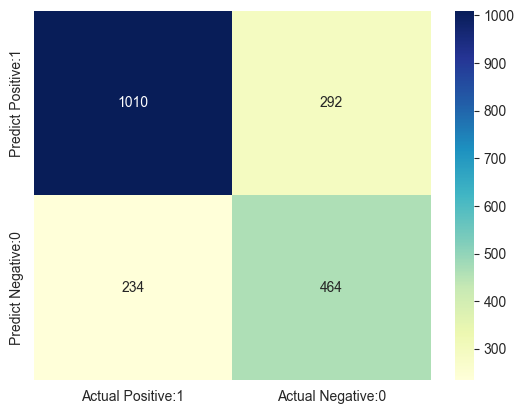

In [28]:
import seaborn as sns

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [29]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [30]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.7370


In [31]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2630


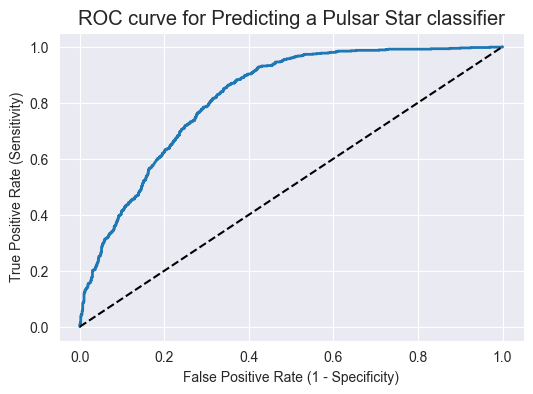

In [32]:
# plot ROC Curve

from sklearn.metrics import roc_curve

y_pred_prob = clf.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Predicting a Pulsar Star classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [34]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred_prob)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8204
